In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import train_test_split
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn import metrics
import time
import seaborn as sns



ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv("./diamonds.csv")

## Understanding the data

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop(columns="Unnamed: 0", inplace= True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data exploration

Text(0.5, 0, 'Price')

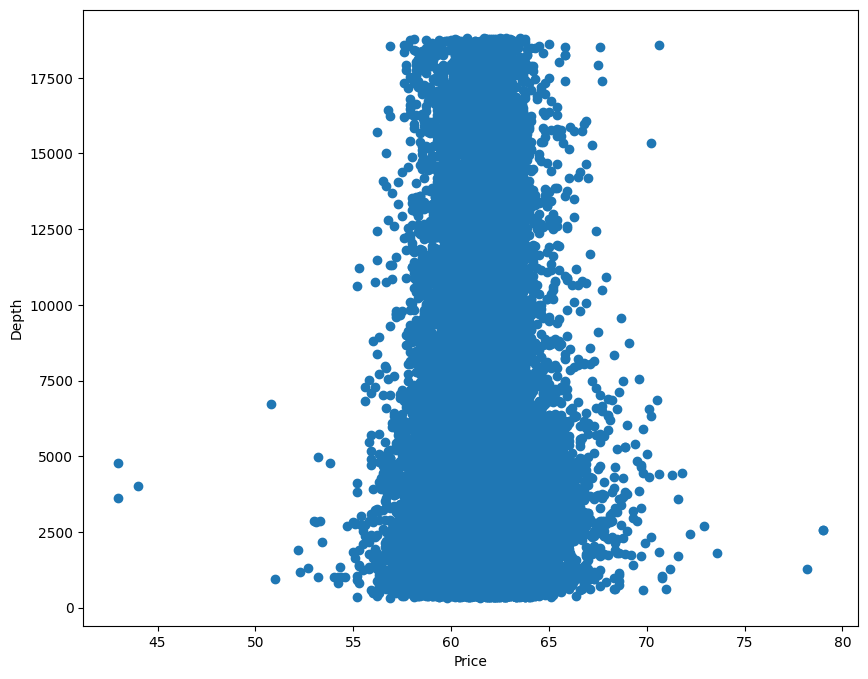

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(x="depth", y="price", data=df)

plt.ylabel("Depth")
plt.xlabel("Price")

<Axes: xlabel='color', ylabel='count'>

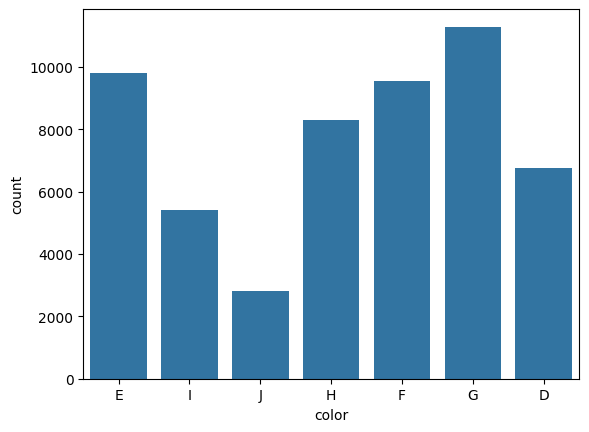

In [8]:
sns.countplot(x="color", data=df)

<Axes: xlabel='cut', ylabel='count'>

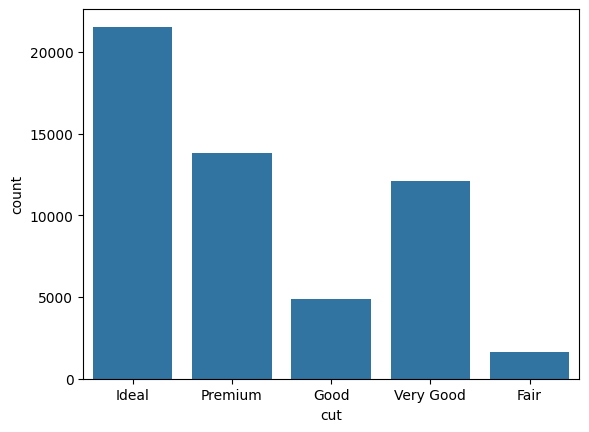

In [9]:
sns.countplot(x="cut", data=df)

## Data Pre-processing and Selection

In [8]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [13]:
cut_dict = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
color_dict = {'E' : 1, 'I' : 2, 'J' : 3, 'H' : 4, 'F' : 5, 'G' : 6, 'D' : 7}
clarity_dict = {'SI2' : 1, 'SI1' : 2, 'VS1' : 3, 'VS2' : 4, 'VVS2' : 5, 'VVS1' : 6, 'I1' :7, 'IF' : 8}

In [14]:
df["cut"] = df["cut"].map(cut_dict)
df["color"] = df["color"].map(color_dict)
df["clarity"] = df["clarity"].map(clarity_dict)

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,3,1,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [18]:
df = sklearn.utils.shuffle(df)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
51384,0.71,3,1,1,63.1,56.0,2368,5.67,5.71,3.58
47807,0.57,3,5,5,63.2,56.0,1902,5.28,5.32,3.35
34133,0.33,5,5,6,61.1,55.0,854,4.48,4.52,2.75
47107,0.70,4,3,2,63.0,56.0,1827,5.66,5.61,3.55
32714,0.31,4,5,4,62.0,58.0,802,4.37,4.31,2.69


In [19]:
df.to_csv("./diamonds_cleaned.csv", index=False)

In [10]:
df = pd.read_csv("./diamonds_cleaned.csv")

In [25]:
def zscore_normalization(data, means=None, stds=None):
    # Create a copy of the data to avoid modifying the original DataFrame
    data_normalized = data.copy()

    # Select only numeric columns
    numeric_data = data_normalized.select_dtypes(include=["float64", "int64"])
    columns_to_normalize = numeric_data.columns

    # Calculate means and standard deviations if not provided
    if means is None or stds is None:
        means = numeric_data.mean(axis=0)
        stds = numeric_data.std(axis=0)

    # Avoid division by zero for constant columns
    stds_replaced = stds.replace(0, 1)

    # Apply Z-score normalization
    data_normalized[columns_to_normalize] = (numeric_data - means) / stds_replaced

    return data_normalized, means, stds

def splitData(
        data,
):
    """
    Split data into training, validation and test sets.

    Parameters:
    - data: Input DataFrame with features and targets.

    Returns:
    - split_train_set: Training set.
    - split_validation_set: Validation set.
    - split_test_set: Test set.
    """

    # Convert to NumPy array
    data_array = np.array(data)

    # Set random seed for reproducibility
    np.random.seed(42)

    # Shuffle the data
    shuffled_indices = np.random.permutation(len(data_array))

    # Calculate the split index
    train_index = int(len(data_array) * 0.60)  # 60% for training
    validation_index = int(len(data_array) * 0.80)  # 20% for validation, 80% cumulative

    # Split the data
    train_indices = shuffled_indices[:train_index]
    validation_indices = shuffled_indices[train_index:validation_index]
    test_indices = shuffled_indices[validation_index:]

    split_train_set = data_array[train_indices]
    split_validation_set = data_array[validation_indices]
    split_test_set = data_array[test_indices]

    # Convert to DataFrames
    split_train_set_df = pd.DataFrame(split_train_set, columns=data.columns)
    split_validation_set_df = pd.DataFrame(split_validation_set, columns=data.columns)
    split_test_set_df = pd.DataFrame(split_test_set, columns=data.columns)

    return split_train_set_df, split_validation_set_df, split_test_set_df



def remove_outliers(df, method="iqr"):
    df_cleaned = df.copy()
    numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

    if method == "zscore":
        from scipy.stats import zscore
        z_scores = np.abs(zscore(df_cleaned[numeric_cols]))
        mask = (z_scores < 3).all(axis=1)
        return df_cleaned[mask]

    elif method == "iqr":
        Q1 = df_cleaned[numeric_cols].quantile(0.25)
        Q3 = df_cleaned[numeric_cols].quantile(0.75)
        IQR = Q3 - Q1
        mask = ~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) |
                 (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
        return df_cleaned[mask]

    else:
        raise ValueError("Metodo non valido. Usa 'zscore' o 'iqr'.")


def preprocessData(data, outlier_method="iqr"):
    # Remove outlier (only on the columns)
    data = remove_outliers(data, method=outlier_method)

    # Split the data
    split_train_set, split_validation_set, split_test_set = splitData(data)

    # Extract target variable
    train_Y = split_train_set["price"]
    validation_Y = split_validation_set["price"]
    test_Y = split_test_set["price"]

    # Drop target column from features
    train_X = split_train_set.drop(["price"], axis=1)
    validation_X = split_validation_set.drop(["price"], axis=1)
    test_X = split_test_set.drop(["price"], axis=1)

    # Normalize features using Z-score
    train_X, train_means, train_stds = zscore_normalization(train_X)
    validation_X, _, _ = zscore_normalization(validation_X, means=train_means, stds=train_stds)
    test_X, _, _ = zscore_normalization(test_X, means=train_means, stds=train_stds)

    # Normalize target variable
    train_Y, y_mean, y_std = zscore_normalization(pd.DataFrame(train_Y))
    validation_Y, _, _ = zscore_normalization(pd.DataFrame(validation_Y), means=y_mean, stds=y_std)
    test_Y, _, _ = zscore_normalization(pd.DataFrame(test_Y), means=y_mean, stds=y_std)

    return (
        np.array(train_X), np.array(train_Y).reshape(-1, 1),
        np.array(validation_X), np.array(validation_Y).reshape(-1, 1),
        np.array(test_X), np.array(test_Y).reshape(-1, 1),
        y_mean, y_std
    )


In [26]:
data_sampled = df.sample(n=2000, random_state=42)  # Set random_state for reproducibility
# Reset index
data_sampled = data_sampled.reset_index(drop=True)

In [27]:
train_X, train_Y, validation_X, validation_Y, test_X, test_Y, y_mean, y_std = preprocessData(data_sampled)

In [28]:
print(train_X.shape)


train_Y = train_Y.reshape(-1,1).flatten()
print(train_Y.shape)

(1016, 9)
(1016,)


In [29]:
print(f"X_train range: {train_X.min()} - {train_X.max()}")
print(f"X_test range: {test_X.min()} - {test_X.max()}")

X_train range: -2.9231518501095586 - 3.5501913235339235
X_test range: -2.9231518501095586 - 2.847100920682092


In [30]:
clf = svm.SVR(kernel='linear')
clf.fit(train_X, train_Y)

SVR(kernel='linear')

In [31]:
clf.score(test_X, test_Y)

0.8907439444479461

In [32]:
def denormalize_price(predictions, y_mean, y_std):
    y_mean = y_mean.values[0] if isinstance(y_mean, pd.Series) else y_mean
    y_std = y_std.values[0] if isinstance(y_std, pd.Series) else y_std
    return predictions * y_std + y_mean


In [39]:
from sklearn import svm
from sklearn.metrics import r2_score

# Fit the model with normalized data
clf = svm.SVR(kernel='rbf')
clf.fit(train_X, train_Y)

# Score on normalized data (standard approach)
normalized_r2_score = clf.score(test_X, test_Y)
print(f"R² score on normalized data: {normalized_r2_score}")

# Predict on test data (normalized predictions)
y_pred_normalized = clf.predict(test_X)

mse = np.mean((y_pred_normalized - test_Y) ** 2)
mee = np.mean(np.abs(y_pred_normalized - test_Y))  # Corretto!
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Euclidean Error (MEE): {mee:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Denormalize the true target (test_Y) and predicted values
y_test_denorm = denormalize_price(test_Y, y_mean, y_std)
y_pred_denorm = denormalize_price(y_pred_normalized, y_mean, y_std)

# Evaluate with R² score on denormalized data
denormalized_r2_score = r2_score(y_test_denorm, y_pred_denorm)
print(f"R² score on denormalized data: {denormalized_r2_score}")
mse = np.mean((y_pred_denorm - y_test_denorm) ** 2)
mee = np.mean(np.abs(y_pred_denorm - y_test_denorm))  # Corretto!
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Euclidean Error (MEE): {mee:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R² score on normalized data: 0.9209148056559724
Mean Squared Error (MSE): 1.9050
Mean Euclidean Error (MEE): 1.0518
Root Mean Squared Error (RMSE): 1.3802
R² score on denormalized data: 0.9209148056559724
Mean Squared Error (MSE): 12081683.6923
Mean Euclidean Error (MEE): 2648.7120
Root Mean Squared Error (RMSE): 3475.8716


In [37]:
def customRegressionReport(trueValues, predictedValues, labels=None, name="val"):
    # Compute metrics
    mse = np.mean((predictedValues - trueValues) ** 2)
    mee = np.mean(np.abs(predictedValues - trueValues))  # Corretto!
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Euclidean Error (MEE): {mee:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Scatter plot true vs predicted
    plt.figure(figsize=(6, 6))
    min_val = min(trueValues.min(), predictedValues.min())
    max_val = max(trueValues.max(), predictedValues.max())

    plt.scatter(trueValues, predictedValues, alpha=0.5, color="blue", label="Predicted Values")
    plt.scatter(trueValues, trueValues, alpha=0.5, color="green", label="True Values")

    # Adding labels to points if provided
    if labels is not None:
        for i, label in enumerate(labels):
            plt.annotate(label, (trueValues[i], predictedValues[i]), fontsize=8, alpha=0.7)

    plt.plot(
        [min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal Fit (y=x)"
    )  # Line y = x

    plt.xlabel("True Values Quality")
    plt.ylabel("Predicted Values Quality")
    plt.title(f"True vs Predicted Quality ({name})")
    plt.legend()
    plt.grid(True)
    plt.legend()

    os.makedirs("plots", exist_ok=True)
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    plt.savefig(f"plots/svr_customRegression_{name}_{timestamp}.png")
    plt.show()

Mean Squared Error (MSE): 1.9050
Mean Euclidean Error (MEE): 1.0518
Root Mean Squared Error (RMSE): 1.3802


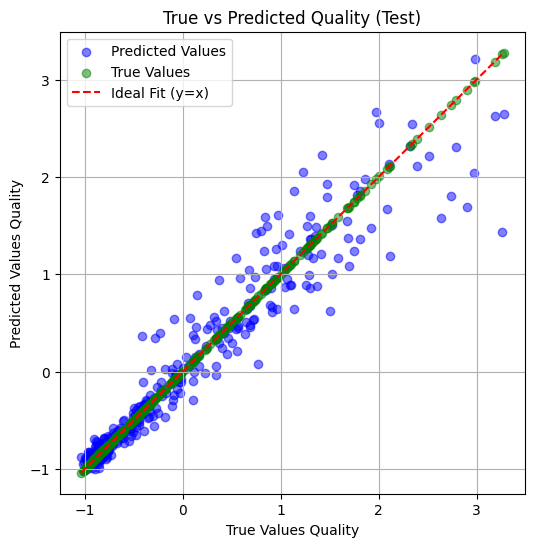

In [40]:
customRegressionReport(test_Y, y_pred_normalized, name="Test")